In [26]:
import numpy as np
import cv2 as cv
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd
import seaborn as sns
import glob
from PIL import Image

import re
import os
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

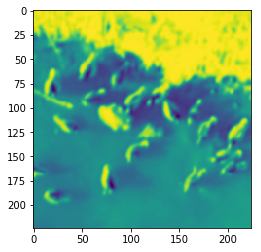

In [27]:
# reading image and converting into gray and blur
img = Image.open('./train/96_1.JPG')
img = np.array(img)



#v = cv.imread('./train/96_1.JPG') #It will loads all the images from a file
blur = cv.GaussianBlur(img,(5,5),0)
gray = cv.cvtColor(blur,cv.COLOR_BGR2GRAY)# here changing  color image to gray scale


plt.imshow(gray)

In [28]:
names=os.listdir('train')#it will get on the images names from a directory
string = ''.join(names)
result=re.findall(r'\_(\d)',string)
Birds = list(map(int, result))
len(Birds)

200

In [29]:
#Function for certain features:
def Headers(Kernel):
    x,y = np.nonzero(thresh)  #It will returns the nonzero values of the array
    x = x - np.mean(x)
    y = y - np.mean(y)
    coords = np.vstack([x, y])
    vax = [np.var(x)]          #Variance(x)
    vax = np.nan_to_num(vax)   # It will replace any null values with zeros
    vay = [np.var(y)]          #Variance(y)
    vay = np.nan_to_num(vay)
    correlation = [np.corrcoef(x,y)[0][1]] #correlation
    correlation = np.nan_to_num(correlation)
    covariance = [np.cov(x,y)[0][1]]    #covariance
    covariance = np.nan_to_num(covariance)
    cov = np.cov(coords)
    cov= np.nan_to_num(cov)
    evals, evecs = np.linalg.eig(cov) #creating eigen values and eigen vectors
    sort_indices =np.argsort(evals)[::-1] # index sorting & inversing [::-1]
    x_v1,y_v1 = evecs[:, sort_indices[0]]  # Eigenvector with largest eigenvalue
    x_v2,y_v2 = evecs[:, sort_indices[1]]  # Eigenvector with lowest eigenvalue
    
    angel1 = math.degrees(np.arctan(y_v1/x_v1))   #theta value of 1st vector
    angel2= math.degrees(np.arctan(y_v2/x_v2))    #theta value of 2nd vector
    return  vax,vay,correlation,covariance,angel1,angel2 #It will give us all above defined values


In [31]:


#blur = cv.GaussianBlur(i,(5,5),cv.CV_64F)
fil = cv.bilateralFilter(gray,5,cv.CV_32F,150,150)
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
ero = cv.erode(fil,kernel,iterations=2)
laplacian = cv.Laplacian(ero,cv.CV_64F)
_,thresh = cv.threshold(laplacian,15,255,cv.THRESH_BINARY)
vaxL,vayL,ccL,dataL,angelL1,angelL2 = Headers(laplacian) #applying function with new variables names


#blur = cv.GaussianBlur(i,(5,5),cv.CV_64F)
cann = cv.Canny(gray,cv.CV_8U,100,200)
_,thresh = cv.threshold(cann,15,255,cv.THRESH_BINARY)
vaxC,vayC,ccC,dataC,angelC1,angelC2 = Headers(cann) #applying function  with new variables names

#blur = cv.GaussianBlur(i,(5,5),cv.CV_64F)
scharrx = cv.Scharr(fil,cv.CV_64F,1,0)# scharrx 
scharry = cv.Scharr(fil,cv.CV_64F,0,1) #scharry
scharr = cv.addWeighted(scharrx,0.5,scharry,0.5,0)
scharr_ = np.maximum(scharr,50) # threshold the value to 50
scharr_[scharr_==50]=0 # collect those values
_, thresh = cv.threshold(scharr_,15,255,cv.THRESH_BINARY)#create a thershold
vaxS,vayS,ccS,dataS,angelS1,angelS2 = Headers(scharr_)#applying function to kernel4 with new variables names

#blur = cv.GaussianBlur(i,(5,5),cv.CV_64F)
sobelx = cv.Sobel(gray,cv.CV_64F,1,0,ksize=5) # sobel x
sobely = cv.Sobel(gray,cv.CV_64F,0,1,ksize=5) # sobel y
sobel = cv.addWeighted(sobelx,0.5,sobely,0.5,0) # sobel = sobel x + sobel y
sobel_ = np.maximum(sobel,50) # threshold the value to 50
sobel_[sobel_==50]=0 # collect those values
_, thresh = cv.threshold(sobel_,15,255,cv.THRESH_BINARY)#create a thershold
vaxO,vayO,ccO,dataO,angelO1,angelO2 = Headers(sobel_) #applying function to kernel1 with new variables namesthose values



# This gives a matrix with same dimesions of our image with all values being 75
matrix = np.ones(gray.shape, dtype = "uint8") * 75
# We use the matrix to add to our image
added = cv2.add(gray, matrix)
_,thresh = cv.threshold(added,15,255,cv.THRESH_BINARY)
vaxa,vaya,cca,dataa,angela1,angela2 = Headers(added)




kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(gray, -1, kernel_sharpening)
_,thresh = cv.threshold(added,15,255,cv.THRESH_BINARY)
vaxsh,vaysh,ccsh,datash,angelsh1,angelsh2 = Headers(added)


#Creating a data frame table for all the features obtained for each kernel:

data={'vaxO':vaxO,'vayO':vayO,'ccO':ccO,'dataO':dataO,'angelO1':angelO1,'angelO2':angelO2,'vaxL':vaxL,'vayL':vayL,'ccL':ccL,'dataL':dataL,'angelL1':angelL1,'angelL2':angelL2,'vaxS':vaxS,'vayS':vayS,'ccS':ccS,'dataS':dataS,'angelS1':angelS1,'angelS2':angelS2,
'vaxC':vaxC,'vayC':vayC,'ccC':ccC,'dataC':dataC,'angelC1':angelC1,'angelC2':angelC2,'vaxa':vaxa,'vaya':vaya,'cca':cca,'dataa':dataa,'angela1':angela1,'angela2':angela2,
     'vaxsh':vaxsh,'vaysh':vaysh,'ccsh':ccsh,'datash':datash,'angelsh1':angelsh1,'angelsh2':angelsh2}


df_temp = pd.DataFrame(data=data)
try:
     df = pd.concat((df,df_temp),ignore_index=True)
except:
    df = df_temp



/home/praveen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
